In [20]:
import numpy as np
import sympy as sp
from sympy import Rational

In [43]:
r, t, z, alpha, M,s = sp.symbols('r, t, z, alpha, M, s', real=True)
S = sp.Function('S')(z,t)
#p = 1/S-M/S**2
p = sp.Function('p')(z,t)
w = -Rational(1,4)*(p.diff(z)-1)*(alpha**2-r**2+2*S**2*sp.log(r/alpha))
u = sp.Function('w')(r,z,t)

u1 = sp.simplify(sp.integrate(-(w.diff(z)*r),r)/r)
u = sp.simplify(u1-u1.subs(r,alpha))
u.subs(r, alpha)

0

In [48]:
sp.simplify((u*r).diff(r))

-alpha**3*Derivative(p(z, t), (z, 2))/16 + alpha**2*r*Derivative(p(z, t), (z, 2))/4 + alpha*S(z, t)**2*Derivative(p(z, t), (z, 2))/8 + alpha*S(z, t)*Derivative(S(z, t), z)*Derivative(p(z, t), z)/4 - alpha*S(z, t)*Derivative(S(z, t), z)/4 - r**3*Derivative(p(z, t), (z, 2))/4 + r*S(z, t)**2*log(r/alpha)*Derivative(p(z, t), (z, 2))/2 + r*S(z, t)*log(r/alpha)*Derivative(S(z, t), z)*Derivative(p(z, t), z) - r*S(z, t)*log(r/alpha)*Derivative(S(z, t), z)

In [50]:
sp.simplify(u.subs(r,S))

-alpha*(alpha**2*Derivative(p(z, t), (z, 2)) - 2*S(z, t)**2*Derivative(p(z, t), (z, 2)) - 4*S(z, t)*Derivative(S(z, t), z)*Derivative(p(z, t), z) + 4*S(z, t)*Derivative(S(z, t), z))/16 + (2*alpha**2*Derivative(p(z, t), (z, 2)) + 4*(S(z, t)*Derivative(p(z, t), (z, 2)) + 2*Derivative(S(z, t), z)*Derivative(p(z, t), z) - 2*Derivative(S(z, t), z))*S(z, t)*log(S(z, t)/alpha) - 3*S(z, t)**2*Derivative(p(z, t), (z, 2)) - 4*S(z, t)*Derivative(S(z, t), z)*Derivative(p(z, t), z) + 4*S(z, t)*Derivative(S(z, t), z))*S(z, t)/16

In [76]:

eta = sp.Function('eta')(z,t)
eta = sp.symbols('eta')
S = alpha*(1+eta/alpha)
p = 1/S-M/S**2
sp.series(2*S**2*(alpha**2-S**2+2*S**2*sp.log(S/alpha))-(alpha**2-S**2)**2, eta, 0, 5)

16*eta**4/3 + 16*alpha*eta**3/3 + O(eta**5)

In [96]:
# S = 1 + eta expansion
S = 1+ eta
p = 1/S-M/S**2
sp.series(2*S**2*(alpha**2-S**2+2*S**2*sp.log(S/alpha))-(alpha**2-S**2)**2, eta, 0, 5)

-2 + 4*log(1/alpha) - (alpha**2 - 1)**2 + eta*(8*alpha**2 + 16*log(1/alpha) - 8) + eta**2*(2*alpha**2 - (alpha**2 - 1)**2*(-2/(alpha**2 - 1) + 4/(alpha**2 - 1)**2) + 24*log(1/alpha) + 2) + eta**3*(16*log(1/alpha) + 16/3) + eta**4*(4*log(1/alpha) + 16/3) + 2*alpha**2 + O(eta**5)

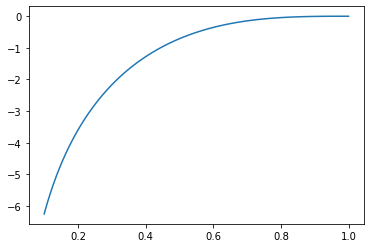

In [99]:
import matplotlib.pyplot as plt
alpha = np.linspace(0.1,1, 100)
plt.plot(alpha, (alpha**2-1)**2-2*(alpha**2-1-2*np.log(alpha)))

In [131]:
### Expansion of the solutions
epsilon,M,R,r,t,z = sp.symbols('epsilon,M,R,r,t,z', real=True)
u_0 = sp.Function('u_0')(r,z,t);u_1 = sp.Function('u_1')(r,z,t);u_2 = sp.Function('u_2')(r,z,t);
w_0 = sp.Function('w_0')(r,z,t);w_1 = sp.Function('w_1')(r,z,t);w_2 = sp.Function('w_2')(r,z,t);
p_0 = sp.Function('p_0')(r,z,t);p_1 = sp.Function('p_1')(r,z,t);p_2 = sp.Function('p_2')(r,z,t);
S_1 = sp.Function('S_1')(r,z,t);S_2 = sp.Function('S_2')(r,z,t);
u = u_0+epsilon*u_1+epsilon**2*u_2
w = w_0+epsilon*w_1+epsilon**2*w_2
p = p_0+epsilon*p_1+epsilon**2*p_2
S = sp.Function('f')(t) + epsilon*S_1 + epsilon**2*S_2
u_0.diff(r)

Derivative(u_0(r, z, t), r)

In [132]:
##continuity equation
continuity = (r*u).diff(r)/r+w.diff(z)
sp.series((r*u).diff(r)/r+w.diff(z), epsilon, 0,2)

u_0(r, z, t)/r + Derivative(w_0(r, z, t), z) + Derivative(u_0(r, z, t), r) + epsilon*(Derivative(u_1(r, z, t), r) + Derivative(w_1(r, z, t), z) + u_1(r, z, t)/r) + O(epsilon**2)

In [133]:
## NS in the r direction
Ns_r = epsilon**2*R*(u.diff(t)+u*u.diff(r)+w*u.diff(z))+p.diff(r)
Ns_r += -epsilon**2*(u.diff(r).diff(r)+epsilon**2*u.diff(z).diff(z)+u.diff(r)/r-u/r**2)
sp.series(Ns_r, epsilon, 0, 3)

Derivative(p_0(r, z, t), r) + epsilon*Derivative(p_1(r, z, t), r) + epsilon**2*(R*u_0(r, z, t)*Derivative(u_0(r, z, t), r) + R*w_0(r, z, t)*Derivative(u_0(r, z, t), z) + R*Derivative(u_0(r, z, t), t) + Derivative(p_2(r, z, t), r) - Derivative(u_0(r, z, t), (r, 2)) - Derivative(u_0(r, z, t), r)/r + u_0(r, z, t)/r**2) + O(epsilon**3)

In [134]:
## NS in the z direction
Ns_z = epsilon**2*R*(w.diff(t)+u*w.diff(r)+w*w.diff(z))-1+p.diff(z)
Ns_z+= -w.diff(r).diff(r)-1/r*w.diff(r)-epsilon**2*w.diff(z).diff(z)
sp.series(Ns_z, epsilon, 0, 3)

-Derivative(w_0(r, z, t), r)/r - 1 - Derivative(w_0(r, z, t), (r, 2)) + Derivative(p_0(r, z, t), z) + epsilon*(Derivative(p_1(r, z, t), z) - Derivative(w_1(r, z, t), (r, 2)) - Derivative(w_1(r, z, t), r)/r) + epsilon**2*(R*u_0(r, z, t)*Derivative(w_0(r, z, t), r) + R*w_0(r, z, t)*Derivative(w_0(r, z, t), z) + R*Derivative(w_0(r, z, t), t) + Derivative(p_2(r, z, t), z) - Derivative(w_0(r, z, t), (z, 2)) - Derivative(w_2(r, z, t), (r, 2)) - Derivative(w_2(r, z, t), r)/r) + O(epsilon**3)

In [135]:
#tangential stress
tang_stress = (1-epsilon**2*S.diff(z)**2)*(epsilon**2*u.diff(z)+w.diff(r))
tang_stress += 2*epsilon**2*S.diff(z)*(u.diff(r)-w.diff(z))
sp.series(tang_stress, epsilon, 0,3)

Derivative(w_0(r, z, t), r) + epsilon*Derivative(w_1(r, z, t), r) + epsilon**2*(Derivative(u_0(r, z, t), z) + Derivative(w_2(r, z, t), r)) + O(epsilon**3)

In [136]:
#normal stress
viscous_stress = 2*epsilon**2/(1+epsilon**2*S.diff(z)**2)*(epsilon**2*S.diff(z)**2*w.diff(z)-2*S.diff(z)*(w.diff(r)+epsilon**2*u.diff(z))+u.diff(r))

surface_tension = 1/sp.sqrt(1+epsilon**2*S.diff(z)**2)*(1/S-epsilon**2*S.diff(z).diff(z)/(1+epsilon**2*S.diff(z)**2))


norm_stress = p - viscous_stress-surface_tension + M/S**2
sp.series(norm_stress, epsilon, 0, 1)

-1/f(t) + p_0(r, z, t) + M/f(t)**2 + O(epsilon)

In [137]:
##kinematic condition
kinematic = S.diff(t)+w*S.diff(z)-u
sp.series(kinematic, epsilon, 0, 3)

Derivative(f(t), t) - u_0(r, z, t) + epsilon*(-u_1(r, z, t) + w_0(r, z, t)*Derivative(S_1(r, z, t), z) + Derivative(S_1(r, z, t), t)) + epsilon**2*(-u_2(r, z, t) + w_0(r, z, t)*Derivative(S_2(r, z, t), z) + w_1(r, z, t)*Derivative(S_1(r, z, t), z) + Derivative(S_2(r, z, t), t)) + O(epsilon**3)